### SECTION.01 2차원 입력 데이터

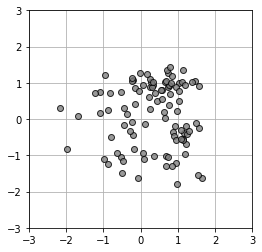

In [1]:
# -------------------- 리스트 9-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ---------------------------
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8) ## np.uint8 - 0 ~ 255 양수
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue','black','white']
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]]) #분포의 중심
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 누적확률 --> len(Pi) = K
for n in range(N): ## 0 ~ 99
    wk = np.random.rand() # 만들어진 난수 어레이는 주어진 값에 의해 결정되며, 0,1 범위에서 균일한 분포
    for k in range(K): ## 0 ~ 2
        if wk < Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2): ## 0 ~ 1
        X[n,k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                  + Mu[T3[n, :] == 1, k])
#         print(Sig[T3[n, :] == 1, k])
#         T3[n, :] == 1 는 T3의 bull 함수 반환 __ 인덱싱을 하면 true인 곳을 숫자로 반환
#         X[n,k] = (np.random.randn() * Sig[0, k])
#         print(Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])
#         print(np.ndarray(X[n,k]))
#         print(Mu[T3[n, :] == 1, k])

# 데이터를 그리기 -----------------------------------------
def show_data(x):
    plt.plot(x[:,0],x[:,1], linestyle='none', # 선모양
            marker = 'o' , markersize = 6, #마커모양, 마커사이즈
            markeredgecolor = 'black', color = 'gray', alpha =0.8) # 마커테두리, 마커색, 마커투명도
    plt.grid(True) # 격자 표시 ON
# T3
# X
# show_data(X)

# 메인 ------------------------------------------------
plt.figure(1, figsize=(4,4)) ## 차트의 크기 설정
show_data(X) ## 함수에 데이터 집어넣기
plt.xlim(X_range0) ## X축 범위 설정
plt.ylim(X_range1) ## X축 범위 설정
plt.show() ## 차트 띄우는 명령
np.savez('data_ch9.npz', X=X , X_range0 = X_range0, ##여러개의 배열을 1개의 압축되지 않은 *.npz 포맷 파일로 저장하기
        X_range1 = X_range1) # 매개변수도 저장해주기
# a = np.load('C:/apps/RNN&reinforcement_learning/data_ch9.npz')
# print(a)

In [2]:
# for n in range(N):
#     wk = np.random.rand()
#     for k in range(K):
#         if wk < Pi[k]:
#             T3[n,k] = 1
#             print(f'Pi[{K}] : {Pi[k]}, T3[{n},{k}] : {T3[n,k]}')
#             break
#     for k in range(2):
#         X[n,k] = (np.random.randn() * Sig[T3[n, : ]== 1, k] + Mu[T3[n,:]== 1, k])
#         print(f'np.random.randn() : {np.random.randn()} \n, Sig[T3{n,:},{k}] : \n{Sig[T3[n,:]]} \n, Mu[T3]{n,:},{k} : {Mu[T3[n,:]],k}')
#         print(f   'X[{n},{k}] : {X[n,k]}\n')

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# np.random.seed(1)
# N = 100
# K = 3
# T3 = np.zeros((N, 3), dtype = np.uint8)
# print(T3.shape)
# X = np.zeros((N, 2))
# print(X.shape)
# print()
# X_range0 = [-3, 3]
# X_range1 = [-3, 3]
# X_col = ['cornflowerblue' ,'black' , 'white']
# Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심 #클러스터 중심
# Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산 # 클러스터 분산
# Pi = np.array([0.4 , 0.8, 1])
# for n in range(N):
#     wk = np.random.rand()
#     for k in range(K):# 0,1,2
#         if wk < Pi[k]: # 데이터에 해당하는 랜덤난수가 pi보다 작으면 1
#             T3[n, k] = 1
#             print()
#             print("n:{}, cluster:{}".format(n,k))
#             break
#     print("T3:",T3[n,])
#     for k in range(2): # 0,1
#         X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] # t3값 1에 해당하는 index 그 index값의 0,1값
#                    + Mu[T3[n, :] == 1, k])
#         print("rand:{} * Sig:{} + Mu:{}".format((X[n, k] - Mu[T3[n, :] == 1, k]) / Sig[T3[n, :] == 1, k],
#                                                 Sig[T3[n, :] == 1, k],
#                                                 Mu[T3[n, :] == 1, k]))
#         print("X[{},{}]".format(n,k),X[n, k])

### SECTION.02 K-means 기법

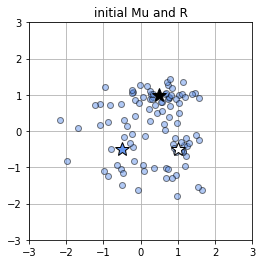

In [5]:
# -------------------- 리스트 9-1-(3)
# 데이터 그리는 함수
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포 묘사하기
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                marker = 'o', markerfacecolor = X_col[k], markeredgecolor='k',
                markersize = 6, alpha = 0.5, linestyle = 'none')
        # 데이터의 평균을 '별표'로 묘사하기
        plt.plot(mu[k, 0], mu[k, 1], marker = '*', # 마커 모양
                markerfacecolor = X_col[k], markersize = 15, # 마커 내부 색, 마커의 크기
                markeredgecolor = 'k', markeredgewidth = 1) # 마커 윤곽선 색, 마커 테두리 두께
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)
plt.figure(figsize=(4,4))
R = np.c_[np.ones((N,1)), np.zeros((N, 2))]
## np.c_ 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

In [6]:
# r 정하기
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
        r[n, np.argmin(wk)] = 1
    return r    

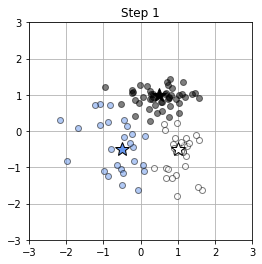

In [7]:
plt.figure(figsize=(4,4))
R = step1_kmeans(X[:,0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

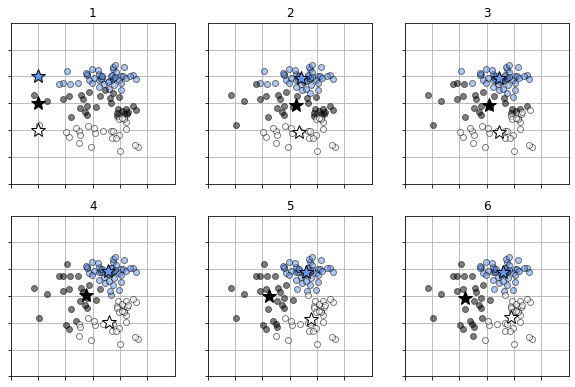

In [8]:
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0)/ np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1)/ np.sum(r[:, k])
    return mu

plt.figure(1, figsize = (10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6 # 반복 횟수
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range0[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

In [9]:
# 목적 함수
def distortion_measure(x0, x1, r, mu):
    # 입력은 2차원으로 제한하고 있음.
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K
                      ):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2
                              +(x1[n] - mu[k, 1])**2)
    return J
# test
# Mu와 R의 초기화
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N,2), dtype=int)]
distortion_measure(X[:,0], X[:,1], R, Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


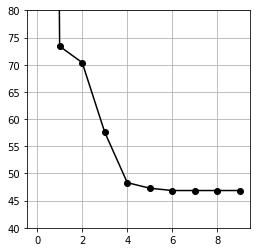

In [10]:
# Mu와 R의 초기화
N = X.shape[0]
K = 3
Mu = np.array([[-2,1], [-2,0], [-2, -1]])
R = np.c_[np.ones((N,1), dtype = int), np.zeros((N, 2), dtype = int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 왜곡 척도의 계산 결과 넣기
for it in range(0, max_it):
    R = step1_kmeans(X[:,0], X[:,1], Mu)
    DM[it] = distortion_measure(X[:,0], X[:, 1], R, Mu) # 왜곡 척도
    Mu = step2_kmeans(X[:,0], X[:,1], R)
print(np.round(DM, 2))
plt.figure(1, figsize=(4,4))
plt.plot(DM, color = 'black', linestyle = '-', marker = 'o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()

In [11]:
%reset #%reset : 모든 변수 삭제

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### SECTION.03 가우시안 혼합 모델

In [12]:
# ----------------- 리스트 9-2-(1)
import numpy as np
wk = np.load('data_ch9.npz') # SECTION.01 2차원 입력 데이터 불러오기
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

In [13]:
# ----------------- 리스트 9-2-(2)
# 가우스 함수 -----------------------------
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D / 2) ## numpy.pi : 원주율 = 3.1415926535897932384626433
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2)) ## np.linalg.det(x) : 행렬식(역행렬의 존재여부, 없으면 0)
    inv_sigma = np.linalg.inv(sigma) ## np.linalg.inv(x) : 역행렬
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma) ## np.dot(a, b) a와 b의 내적
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2) ## np.exp() : 자연로그 e의()승
    return p

In [20]:
# x = np.array([[1,1],
#             [2,2],
#             [3,3]])

# N, D = x.shape
# x.shape
# # print(D)

In [40]:
# x = np.array([[1,3],[2,1],[3,4]])
# mu = np.array([1,2])
# x-mu

In [42]:
# np.zeros(2)

In [ ]:
# ----------------- 리스트 9-2-(2)
# 가우스 함수 -----------------------------
def gauss(x, mu, sigma):
    N, D = x.shape # (3, 2)
    c1 = 1 / (2 * np.pi)**(D / 2) # 1 / 2pi
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2)) # 1 / sqrt(행렬식(sigma)) ad - bc 1 * 1 - 0 * 0
    inv_sigma =  sigma.T # np.linalg.inv(sigma) # sigma 역행렬 
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [ ]:
# ----------------- 리스트 9-2-(3)
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

In [14]:
# ----------------- 리스트 9-2-(3)
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [15]:
# ----------------- 리스트 9-2-(4)
# 혼합 가우시안 모델 ----------------------
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [ ]:
# ------------ 리스트 9-2-(5)
# test -------------------------------
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]])
print(mixgauss(x, pi, mu, sigma))

In [ ]:
# ----------------- 리스트 9-2-(6)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
# 혼합 가우스 등고선 표시 ----------------------
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors='gray')


# 혼합 가우스 3D 표시 ---------------------------
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

In [ ]:
# ------------ 리스트 9-2-(7)
# test -----------------------------------
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array(
    [[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])


Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)


Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

In [ ]:
# ----------------- 리스트 9-2-(8)
# 초기 설정 ------------------------------------
N = X.shape[0]
K = 3
Pi = np.array([0.33, 0.33, 0.34])
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]


X_col=np.array([[0.4, 0.6, 0.95], [1, 1, 1], [0, 0, 0]])


# 데이터를 그리기 ------------------------------
def show_mixgauss_prm(x, gamma, pi, mu, sigma):
    N, D = x.shape
    show_contour_mixgauss(pi, mu, sigma)
    for n in range(N):
        col=gamma[n,0]*X_col[0]+gamma[n,1]*X_col[1]+gamma[n,2]*X_col[2]
        plt.plot(x[n, 0], x[n, 1], 'o',
                 color=tuple(col), markeredgecolor='black',
                 markersize=6, alpha=0.5)
    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*',
                 markerfacecolor=tuple(X_col[k]), markersize=15,
                 markeredgecolor='k', markeredgewidth=1)
        
        
    plt.grid(True)


plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [ ]:
# ----------------- 리스트 9-2-(9)
# gamma 갱신 (E Step) -------------------
def e_step_mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # KxN
    gamma = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = pi[k] * y[n, k]
        gamma[n, :] = wk / np.sum(wk)
    return gamma


# 메인 ----------------------------------
Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)

In [ ]:
# -------------- 리스트 9-2-(10)
# 표시 ----------------------------------
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [ ]:
# ----------------- 리스트 9-2-(11)
# Pi, Mu, Sigma 갱신 (M step) ------------
def m_step_mixgauss(x, gamma):
    N, D = x.shape
    N, K = gamma.shape
    # pi를 계산
    pi = np.sum(gamma, axis=0) / N
    # mu을 계산
    mu = np.zeros((K, D))
    for k in range(K):
        for d in range(D):
            mu[k, d] = np.dot(gamma[:, k], x[:, d]) / np.sum(gamma[:, k])
    # sigma를 계산
    sigma = np.zeros((K, D, D))
    for k in range(K):
        for n in range(N):
            wk = x - mu[k, :]
            wk = wk[n, :, np.newaxis]
            sigma[k, :, :] = sigma[k, :, :] + gamma[n, k] * np.dot(wk, wk.T)
        sigma[k, :, :] = sigma[k, :, :] / np.sum(gamma[:, k])
    return pi, mu, sigma


# 메인 ----------------------------------
Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)

In [ ]:
# ----------------- 리스트 9-2-(12)
# 표시 ----------------------------------
plt.figure(1, figsize=(4, 4))
show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
plt.show()

In [ ]:
# ----------------- 리스트 9-2-(13)
Pi = np.array([0.3, 0.3, 0.4])
Mu = np.array([[2, 2], [-2, 0], [2, -2]])
Sigma = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])
Gamma = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
plt.figure(1, figsize=(10, 6.5))
max_it = 20 # 반복 횟수


i_subplot=1;
for it in range(0, max_it):
    Gamma = e_step_mixgauss(X, Pi, Mu, Sigma)
    if it<4 or it>17:
        plt.subplot(2, 3, i_subplot)
        show_mixgauss_prm(X, Gamma, Pi, Mu, Sigma)
        plt.title("{0:d}".format(it + 1))
        plt.xticks(range(X_range0[0], X_range0[1]), "")
        plt.yticks(range(X_range1[0], X_range1[1]), "")
        i_subplot=i_subplot+1
    Pi, Mu, Sigma = m_step_mixgauss(X, Gamma)
plt.show()

In [ ]:
# ----------------- 리스트 9-2-(14)
# 혼합 가우스의 목적 함수 ----------------------
def nlh_mixgauss(x, pi, mu, sigma):
    # x: NxD
    # pi: Kx1
    # mu: KxD
    # sigma: KxDxD
    # output lh: NxK
    N, D = x.shape
    K = len(pi)
    y = np.zeros((N, K))
    for k in range(K):
        y[:, k] = gauss(x, mu[k, :], sigma[k, :, :]) # KxN
    lh = 0
    for n in range(N):
        wk = 0
        for k in range(K):
            wk = wk + pi[k] * y[n, k]
        lh = lh + np.log(wk)
    return -lh